In [18]:
from collections import Counter
import itertools
import networkx as nx

## Initializing the Matrix

In [20]:
names_map = []
with open("TEST_MAP.namesMap") as namesMap:
    for name in namesMap:
        names_map.append(name.split()[1])

## Count colors and set groups

In [21]:
groups = {}
colors = []
with open("TEST_MAP.map") as MAP:
    for line in MAP:
        line = line.rstrip('\n')
        if ":" in line:
            colors.append(line.split(":")[1])
        elif "-" in line:
            s = line.split("-")
            groups[s[0]] = s[1].split(",")[:-1]

colors = Counter(colors)

In [24]:
G = nx.DiGraph()

## Construct the graph

In [25]:
for color, tr_ids in groups.items():
    color_count = colors[color]
    if len(tr_ids) == 1:
        # df[tr_ids[0]][tr_ids[0]] = color_count
        continue

    for combination in itertools.combinations(tr_ids,2):
        if G.has_edge(combination[0], combination[1]):
            G[combination[0]][combination[1]]["length"] += color_count
        
        else:
            G.add_edge(combination[0], combination[1], length = color_count)

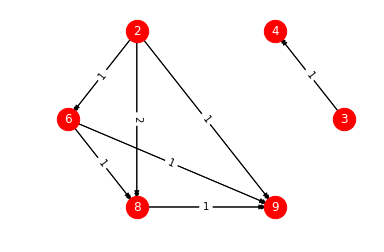

In [26]:
length = nx.get_edge_attributes(G, 'length')
pos = nx.circular_layout(G, scale=1.5)
nx.draw_networkx(G, pos, font_color="white")
nx.draw_networkx_edge_labels(G, pos, edge_labels=length)
nx.draw(G, pos, node_size=500)